## Mode interpretation of the heat equation
Consider the heat equation
\begin{align}
	u_t = ku_{xx}, \qquad 0<x<L, \, t>0.
\end{align}

This is subject to Dirichlet boundary conditions, i.e. 
\begin{align}
	u(0,t) &= 0,\\
	u(L,t) &= 0,\\
	u(x,0) &= f(x).
\end{align}

The solution was computed by hand using eigenfunction expansion and reads as
\begin{align}
    u(x,t) &= \sum_{n=1}^\infty a_n(t) \sin\left(\frac{n\pi}{L}x\right),\\
    a_n(t) & = f_n e^{-k \lambda_n t}, \\
\end{align}
and
\begin{align}
    f_n &= \frac{2}{L} \int_0^L f(x) \sin\left(\frac{n\pi}{L}x\right) \, dx
\end{align}

Each term in the sum is called a **mode**. Hence, the mode with index $n$ is called the $n^{th}$ mode. We will analyse these modes more closely. First observe that each mode contains seperate terms affected by the initial condition and by the source term. Hence the effect of the IC and source can be regarded separately. 

### 1. Initial condition
We assume that the initial condition $f(x)$ is some random (i.e. noisy) signal. The Fourier coefficients $f_n$ are the projections of this onto the sines. In the example below we compute up to 100 modes of $f_n$ (i.e. $n=1,\ldots,100$).


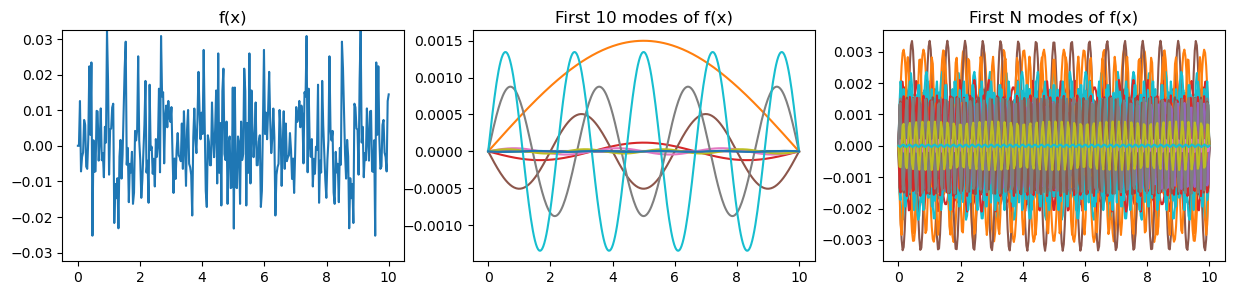

In [109]:
import numpy as np
import matplotlib.pyplot as plt
L = 10
k = 1
T = 0.1
xmax = 300
tmax = 400
N = 100
x = np.linspace(0, L, xmax).reshape((xmax, 1, 1))
t = np.linspace(0, T, tmax).reshape((1, tmax, 1))

# generate some noisy initial condition
fvar = np.random.rand(xmax)
fvar = np.real(np.fft.ifft(fvar))

f =  fvar
f[0] = 0
f[1] = 0

n = np.arange(0,N).reshape((1,1,N))
modes = np.array((len(x), len(t), N))

phi_n = np.sin(n*np.pi/L*x)
la_n = (n*np.pi/L)**2
fn = 2/L*np.trapz(f.reshape((xmax,1,1))*phi_n, x.flatten(), axis=0)
fn = fn.reshape((1,fn.shape[0], fn.shape[1]))
a_n = fn*np.exp(-k*la_n*t)

modes = a_n*phi_n
u = np.sum(modes, axis=-1)

# Figure 1
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
plt.plot(x.flatten(), f)
plt.ylim(-np.max(np.abs(f)), np.max(np.abs(f)))
plt.title('f(x)')

plt.subplot(1,3,2)
plt.plot(x.flatten(), modes[:, 0, :11])
plt.title('First 10 modes of f(x)')

plt.subplot(1,3,3)
plt.plot(x.flatten(), modes[:, 0, :])
plt.title('First N modes of f(x)')

plt.show()

You may wonder if $f(x)$ is now reasonably captured by these 100 modes. We may check this by computing
\begin{align}
\tilde{f} = \sum_{n=1}^{100}f_n \sin(\frac{n\pi}{L}x).
\end{align}
and next plotting $\tilde{f}$ and $f$ together.

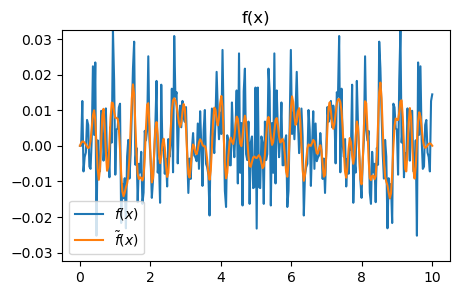

In [110]:
plt.figure(figsize=(5,3))
plt.plot(x.flatten(), f, label=r'$f(x)$')
plt.plot(x.flatten(), u[:,0], label=r'$\tilde{f}(x)$')
plt.ylim(-np.max(np.abs(f)), np.max(np.abs(f)))
plt.legend()
plt.title('f(x)')
plt.show()

It seems the approximation is not quite accurate yet. 
You may try to increase N in the code above to see when this improves. Note that the plot of the higher modes in the pannel 'all modes of f(x)' shows variable amplitude over $x$. This is simply a plotting error due to aliasing effects; the number of $x$-points is insufficient to plot these modes accurately. All modes have constant amplitude over $x$

# 2. Time and space scales

Consider a single mode:
\begin{align}
    u_n(x,t) &= f_n e^{-k \lambda_n t} \sin\left(\frac{n\pi}{L}x\right).
\end{align}
We can write this as
\begin{align}
    u_n(x,t) &= f_n e^{-t/T_n} \sin\left(x/L_n\right),
\end{align}
with $T$ a *typical timescale* and $L_n$ a *typical length scale* given by
\begin{align}
    L_n &= \frac{L}{n\pi}, \\
    T_n &= \frac{L^2}{kn^2\pi^2}.
\end{align}

Below we plot mode $n=1$, mode $n=10$ and mode $n=30$ at t=0 and t=0.1 s. 
Let us check the values of the exponential term for each of these modes for t=0.1 s (all given the default values in this notebook):

- $n=1$:  $T_1\approx 10$, $e^{-.1/T_1}=0.99$,
- $n=10$:  $T_1\approx 0.1$, $e^{-.1/T_1}=0.37$,
- $n=30$:  $T_1\approx 0.01$, $e^{-.1/T_1}=0.0001$,

In words, after 0.1s elapsed, 99% of mode 1 remains, 37% of mode 10 remains and almost nothing of mode 30 remains.

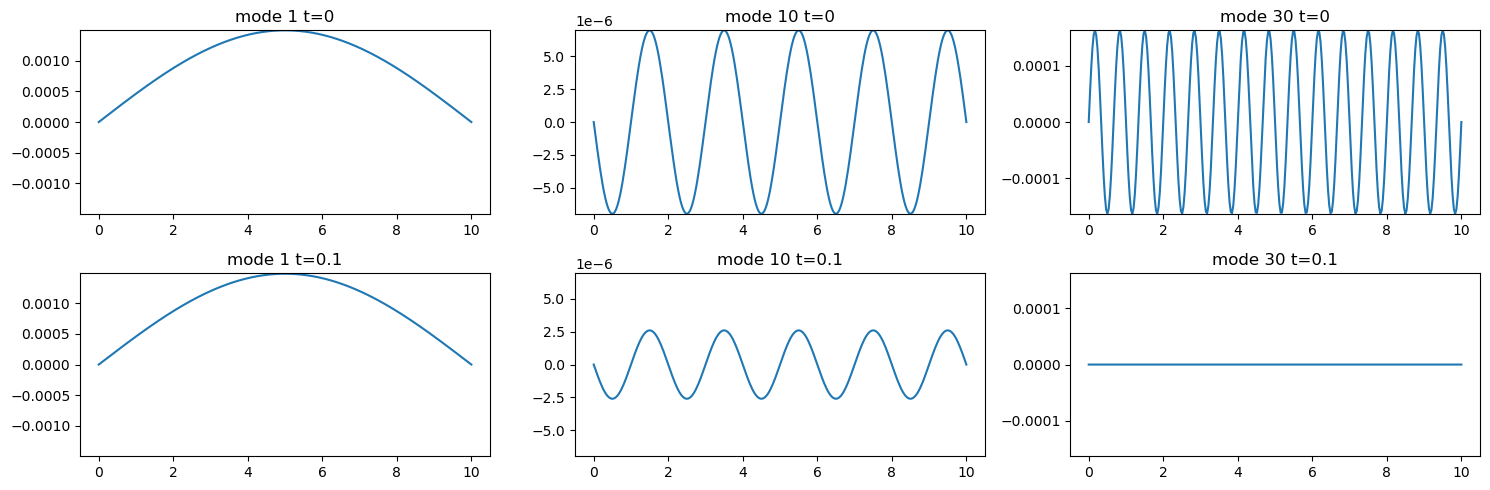

In [114]:
plt.figure(figsize=(15,5))
tind=-1
plt.subplot(2,3,1)
plt.plot(x.flatten(), modes[:,0,1])
plt.ylim(-np.max(np.abs(modes[:,0,1])), np.max(np.abs(modes[:,0,1])))
plt.title('mode 1 t=0')

plt.subplot(2,3,2)
plt.plot(x.flatten(), modes[:,0,10])
plt.ylim(-np.max(np.abs(modes[:,0,10])), np.max(np.abs(modes[:,0,10])))
plt.title('mode 10 t=0')

plt.subplot(2,3,3)
plt.plot(x.flatten(), modes[:,0,30])
plt.ylim(-np.max(np.abs(modes[:,0,30])), np.max(np.abs(modes[:,0,30])))
plt.title('mode 30 t=0')

plt.subplot(2,3,4)
plt.plot(x.flatten(), modes[:,tind,1])
plt.ylim(-np.max(np.abs(modes[:,0,1])), np.max(np.abs(modes[:,0,1])))
plt.title(f'mode 1 t={T}')

plt.subplot(2,3,5)
plt.plot(x.flatten(), modes[:,tind,10])
plt.ylim(-np.max(np.abs(modes[:,0,10])), np.max(np.abs(modes[:,0,10])))
plt.title(f'mode 10 t={T}')

plt.subplot(2,3,6)
plt.plot(x.flatten(), modes[:,tind,30])
plt.ylim(-np.max(np.abs(modes[:,0,30])), np.max(np.abs(modes[:,0,30])))
plt.title(f'mode 30 t={T}')
plt.tight_layout()
plt.show()

Let us then consider the final solution u(x,t) at several points in time

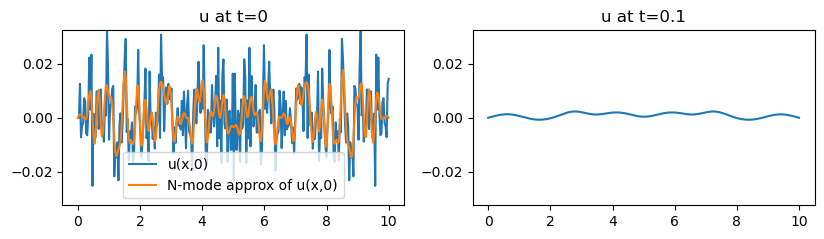

In [112]:
plt.figure(figsize=(15,5))
tind=-1
plt.subplot(2,3,1)
plt.plot(x.flatten(), f[:], label='u(x,0)')
plt.plot(x.flatten(), u[:,0], label='N-mode approx of u(x,0)')
plt.ylim(-np.max(np.abs(f)), np.max(np.abs(f)))
plt.legend()
plt.title('u at t=0')

plt.subplot(2,3,2)
plt.plot(x.flatten(), u[:,-1])
plt.ylim(-np.max(np.abs(f)), np.max(np.abs(f)))
plt.title(f'u at t={T}')
plt.show()

### 3. Source term
Next, consider a noise source of energy input. For simplicity, let $f(x)=0$ and $Q(x,t)=Q(x)$. 

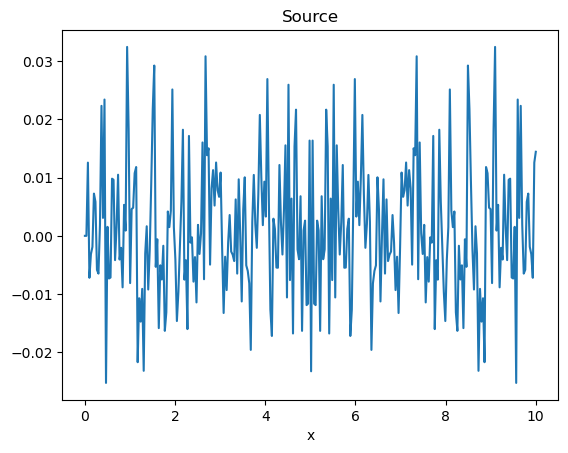

In [124]:
# generate some noisy Q whcih i
Qvar = np.random.randn(xmax)
Qvar = np.fft.ifft(Qvar)
Q =  fvar

plt.figure()
plt.plot(x.flatten(), Q)
plt.title('Source')
plt.xlabel('x')
plt.show()

The solution now is given by
\begin{align}
    u(x,t) = \sum_{n=1}^\infty \frac{\hat{q}_n}{\lambda_n k}\left(1-e^{-\lambda_n k t}\right) \sin\left(\frac{n\pi}{L}x\right),
\end{align}
with
\begin{align}
\hat{q}_n = \frac{2}{L}\int_0^L Q(x)\phi_n(x) \, dx.
\end{align}

For $t\rightarrow \infty$ we observe that each mode tends to
\begin{align}
    \lim_{t\rightarrow \infty}u_n(x,t) = \frac{\hat{q}_n}{\lambda_n k}\sin\left(\frac{n\pi}{L}x\right).
\end{align}
Hence, higher modes tend to have smaller amplitude because of the division by $\lambda_n=\frac{n^2\pi^2}{L^2}$. 

Physically, one could think of this the following way: the temperature observed is a result of all heat input in the past. High-mode heat input decays fast and therefore we 'see' only the energy input at these high modes from recent times. For lower modes, the decay is much slower and hence we see the result of energy input over a longer time. If the rate of energy input at high and low modes is similar (which is the case here), after some time we observe much more energy in the lower modes because of the longer *memory* of the system for these modes. 

Next looking at times just after $t=0$, all modes still are similarly important, because this memory effect did not have time to develop yet. See the figures below.

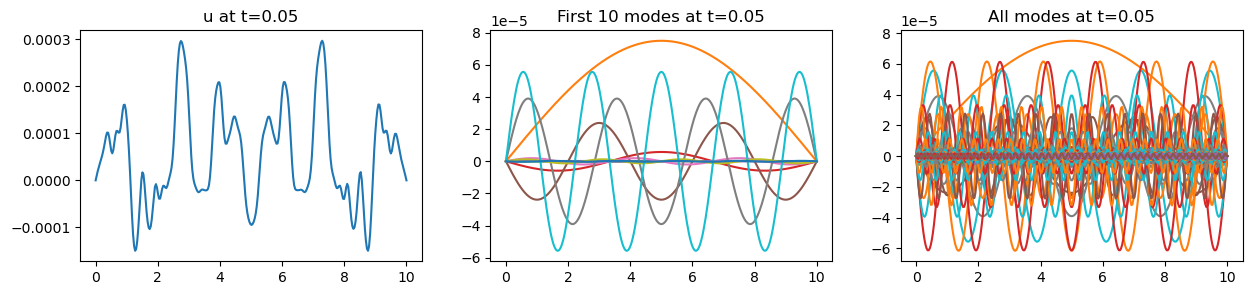

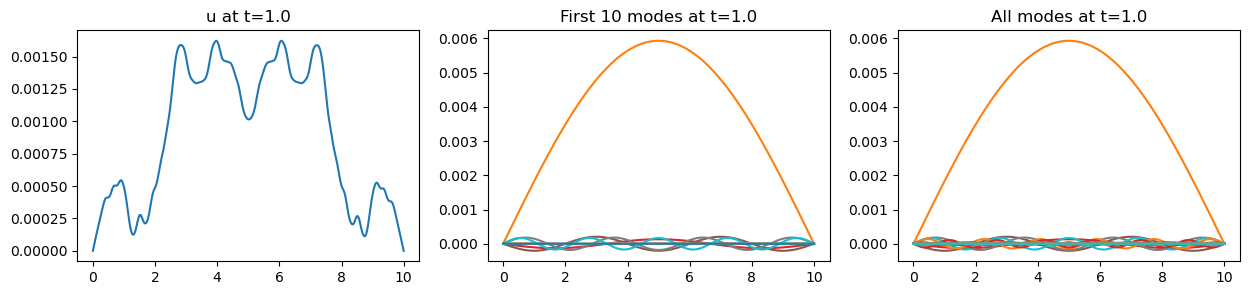

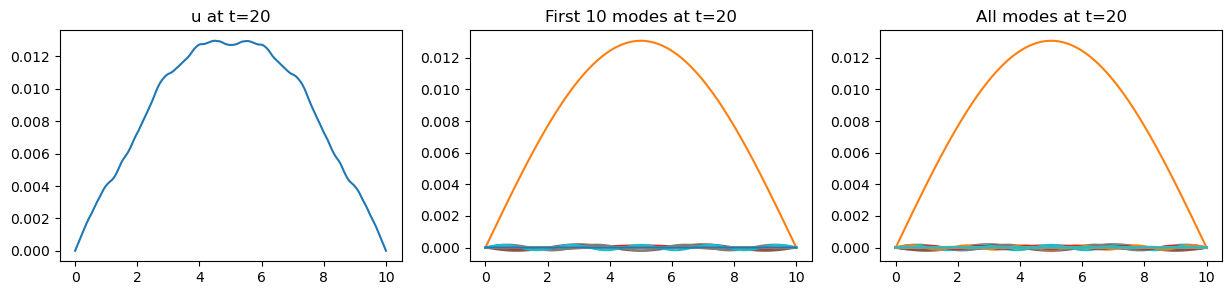

In [127]:
T = 20
x = np.linspace(0, L, xmax).reshape((xmax, 1, 1))
t = np.linspace(0, T, tmax).reshape((1, tmax, 1))
qn = 2/L*np.trapz(Q.reshape((xmax,1,1))*phi_n, x.flatten(), axis=0)
qn = qn.reshape((1,qn.shape[0], qn.shape[1]))
dt = t[0,1,0]-t[0,0,0]
a_Q_n = qn/((la_n+1e-10)*k)*(1-np.exp(-k*la_n*t))
a_Q_n[:,:,0]=0
modes_Q = a_Q_n*phi_n
u_Q = np.sum(modes_Q, axis=-1)

plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
plt.plot(x.flatten(), u_Q[:, 1])
# plt.ylim(-np.max(np.abs(f)), np.max(np.abs(f)))
plt.title(f'u at t={np.round(t[0,1,0],2)}')

plt.subplot(1,3,2)
plt.plot(x.flatten(), modes_Q[:, 1, :11])
plt.title(f'First 10 modes at t={np.round(t[0,1,0],2)}')

plt.subplot(1,3,3)
plt.plot(x.flatten(), modes_Q[:, 1, :-4])
plt.title(f'All modes at t={np.round(t[0,1,0],2)}')

plt.figure(figsize=(15,3))
timind = int(np.floor(tmax/20))
plt.subplot(1,3,1)
plt.plot(x.flatten(), u_Q[:, timind])
# plt.ylim(-np.max(np.abs(f)), np.max(np.abs(f)))
plt.title(f'u at t={np.round(t[0,timind,0],2)}')

plt.subplot(1,3,2)
plt.plot(x.flatten(), modes_Q[:, int(tmax/4), :11])
plt.title(f'First 10 modes at t={np.round(t[0,timind,0],2)}')

plt.subplot(1,3,3)
plt.plot(x.flatten(), modes_Q[:, int(tmax/4), :])
plt.title(f'All modes at t={np.round(t[0,timind,0],2)}')
plt.show()

plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
plt.plot(x.flatten(), u_Q[:, -1])
# plt.ylim(-np.max(np.abs(f)), np.max(np.abs(f)))
plt.title(f'u at t={T}')

plt.subplot(1,3,2)
plt.plot(x.flatten(), modes_Q[:, -1, :11])
plt.title(f'First 10 modes at t={T}')

plt.subplot(1,3,3)
plt.plot(x.flatten(), modes_Q[:, -1, :])
plt.title(f'All modes at t={T}')

plt.show()